In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from WindPy import w
import empyrical
%matplotlib inline

C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\empyrical\utils.py:32: UserWarning: Unable to import pandas_datareader. Suppressing import error and continuing. All data reading functionality will raise errors; but has been deprecated and will be removed in a later version.
  warnings.warn(msg)


In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2020 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [153]:
start_date, end_date = '2018-01-01', '2020-11-19'

In [154]:
st_codes = '000082.OF'
data = w.wsd(st_codes, 'nav_adj', start_date, end_date)

In [155]:
st_price = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=data.Codes)

In [156]:
st_ret = st_price.pct_change().mean(axis=1)

In [157]:
empyrical.annual_return(st_ret)

0.17601417143455933

In [158]:
bd_codes = '070037.OF'
data = w.wsd(bd_codes, 'nav_adj', start_date, end_date)

In [159]:
bd_price = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=data.Codes)

In [160]:
bd_ret = bd_price.pct_change().mean(axis=1)

In [161]:
bd_ret.shape[0]

700

In [162]:
empyrical.annual_return(bd_ret)

0.047703250547860954

In [163]:
# pf_ret = allocation['cn_equity_li'] * st_ret + allocation['cn_bond_li'] * bd_ret
# pf_ret = 0.1 * st_ret + 0.9 * bd_ret
# target = 0.05
# pf_ret = 0.2 * st_ret + 0.8 * bd_ret
# target = 0.07
# pf_ret = 0.4 * st_ret + 0.6 * bd_ret
# target = 0.09
pf_ret = 0.9 * st_ret + 0.1 * bd_ret
target = 0.15

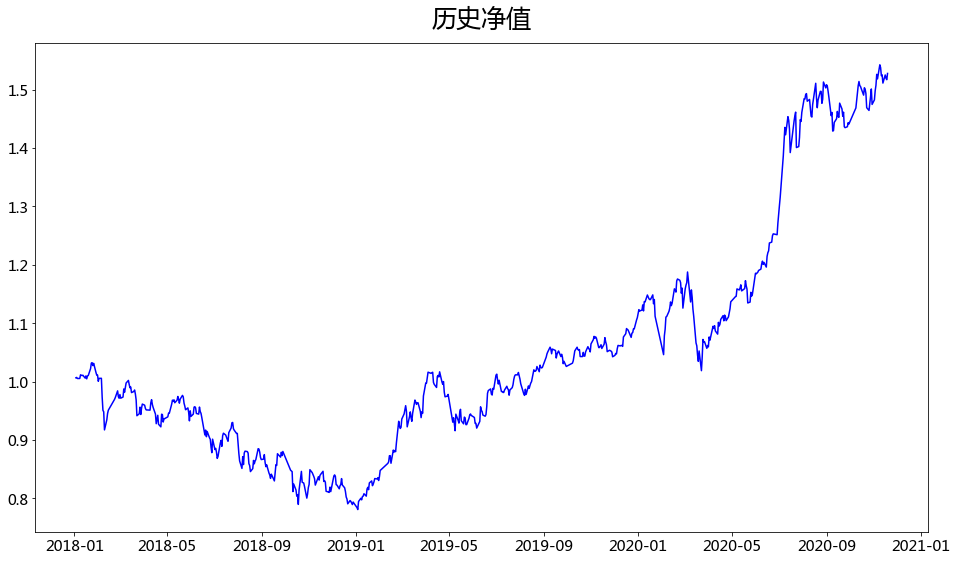

In [164]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot((1 + pf_ret).cumprod(), color='blue')

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
_ = ax.set_title(u'历史净值', fontsize=25, y=1.02)

In [165]:
empyrical.annual_return(pf_ret)

0.1648028711487204

In [166]:
empyrical.max_drawdown(pf_ret)

-0.24372604491026162

In [167]:
empyrical.annual_volatility(pf_ret)

0.18577094816518747

In [168]:
empyrical.sharpe_ratio(pf_ret)

0.9155602125674152

In [169]:
pf_ret_6m = pf_ret.rolling(window=121).apply(lambda x: empyrical.annual_return(x), raw=True).shift(-121)
pf_ret_1y = pf_ret.rolling(window=243).apply(lambda x: empyrical.annual_return(x), raw=True).shift(-243)
pf_ret_2y = pf_ret.rolling(window=243*2).apply(lambda x: empyrical.annual_return(x), raw=True).shift(-243*2)
pf_ret_3y = pf_ret.rolling(window=243*3).apply(lambda x: empyrical.annual_return(x), raw=True).shift(-243*3)
# pf_ret_4y = pf_ret.rolling(window=243*4).apply(lambda x: empyrical.annual_return(x), raw=True).shift(-243*4)
pf_ret_5y = pf_ret.rolling(window=243*5).apply(lambda x: empyrical.annual_return(x), raw=True).shift(-243*5)

# 持有期6个月

In [170]:
pf_ret_6m[pf_ret_6m > target].size / pf_ret_6m.dropna().size

0.6252158894645942

In [171]:
pr_ret_6m[pr_ret_6m > 0].size / pr_ret_6m.dropna().size

0.9826478149100257

In [172]:
pf_ret.rolling(window=121).apply(lambda x: empyrical.max_drawdown(x), raw=True).max()

-0.03865418594960996

In [173]:
pf_ret_6m.median()

0.2432357836412382

# 持有期1年

In [174]:
pf_ret_1y[pf_ret_1y > target].size / pf_ret_1y.dropna().size

0.612691466083151

In [175]:
pf_ret_1y[pf_ret_1y > 0].size / pf_ret_1y.dropna().size

0.8205689277899344

In [176]:
pf_ret.rolling(window=243).apply(lambda x: empyrical.max_drawdown(x), raw=True).max()

-0.09926145636261148

In [177]:
pf_ret_1y.median()

0.24391031250914574

# 持有期2年

In [178]:
pf_ret_2y[pf_ret_2y > target].size / pf_ret_2y.dropna().size

0.48598130841121495

In [179]:
pf_ret_2y[pf_ret_2y > 0].size / pf_ret_2y.dropna().size

1.0

In [180]:
pf_ret.rolling(window=243*2).apply(lambda x: empyrical.max_drawdown(x), raw=True).max()

-0.14233101375671

In [181]:
pf_ret_2y.median()

0.13198172159885324

# 持有期3年

In [182]:
pf_ret_3y[pf_ret_3y > target].size / pf_ret_3y.dropna().size

ZeroDivisionError: division by zero

In [183]:
pf_ret_3y[pf_ret_3y > 0].size / pf_ret_3y.dropna().size

ZeroDivisionError: division by zero

In [147]:
pf_ret.rolling(window=243*3).apply(lambda x: empyrical.max_drawdown(x), raw=True).max()

-0.23517219033478254

In [148]:
pf_ret_3y.median()

0.11062399210634677

# 持有期5年

In [149]:
pf_ret_5y[pf_ret_5y > target].size / pf_ret_5y.dropna().size

0.31385281385281383

In [150]:
pf_ret_5y[pf_ret_5y > 0].size / pf_ret_5y.dropna().size

1.0

In [151]:
pf_ret.rolling(window=243*5).apply(lambda x: empyrical.max_drawdown(x), raw=True).max()

-0.24372604491026073

In [152]:
pf_ret_5y.median()

0.13825451723818094